## STA302 Final Project ##

In [4]:
library(UsingR)
library(scatterplot3d)
library(xtable)
library(car)
library(Matrix)
library(MPV)



In [5]:
rm(list = ls())
# setwd("~/Dropbox/UofT Admin and TA/STA 302/Lectures/Final Project")


library(NHANES)
library(tidyverse)
library(glmnet)
library(rms)

small.nhanes <- na.omit(NHANES[NHANES$SurveyYr=="2011_12"
                               & NHANES$Age > 17,c(1,3,4,8:11,13,17,20,21,25,46,50,51,52,61)])
small.nhanes <- as.data.frame(small.nhanes %>%
  group_by(ID) %>% filter(row_number()==1) )
# nrow(small.nhanes)

## Checking whether there are any ID that was repeated. If not ##
## then length(unique(small.nhanes$ID)) and nrow(small.nhanes) are same ##
# length(unique(small.nhanes$ID))

## Create training and test set ##
set.seed(1003998757)
train <- small.nhanes[sample(seq_len(nrow(small.nhanes)), size = 400),]
# nrow(train)
length(which(small.nhanes$ID %in% train$ID))
test <- small.nhanes[!small.nhanes$ID %in% train$ID,]
# nrow(test)

[1] 400

not limited to):
• Model Diagnostics
• Checking for the variance inflation factor (VIF)
• Variable selection ---> model selection
• Shrinkage methods ---> LASSO 
• Model Validation


• Checking the prediction error on the test set after applying various model selection techniques
• After selecting the best model interpret and explain the parameter estimates
• Conclude on the effect of predictors on the combined systolic blood pressure readin

In [6]:
## Running the model ##
### First fit a multiple linear regression ##
model.lm <- lm( BPSysAve ~ ., data = train[, -c(1)])
summary(model.lm)


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

## Model Diagnostics ##

,(Intercept),Gendermale,Age,Race3Black,Race3Hispanic,Race3Mexican,Race3White,Race3Other,Education9 - 11th Grade,EducationHigh School,⋯,Poverty,Weight,Height,BMI,DepressedSeveral,DepressedMost,SleepHrsNight,SleepTroubleYes,PhysActiveYes,SmokeNowYes
140,1,1,22,0,0,1,0,0,0,1,⋯,1.53,99.9,176.8,32.0,0,0,7,0,1,1
278,1,0,26,0,0,0,1,0,0,0,⋯,2.75,60.2,164.4,22.3,0,0,8,0,1,1
661,1,1,46,0,0,0,1,0,1,0,⋯,1.21,64.5,174.7,21.1,0,1,4,1,1,1
510,1,1,24,0,0,0,1,0,0,0,⋯,0.31,69.2,176.0,22.3,0,0,6,0,1,1
663,1,1,59,0,0,0,1,0,0,0,⋯,5.00,84.0,185.3,24.5,0,0,6,1,0,0
312,1,0,23,0,0,0,1,0,0,0,⋯,2.94,63.1,162.1,24.0,0,0,5,0,1,1


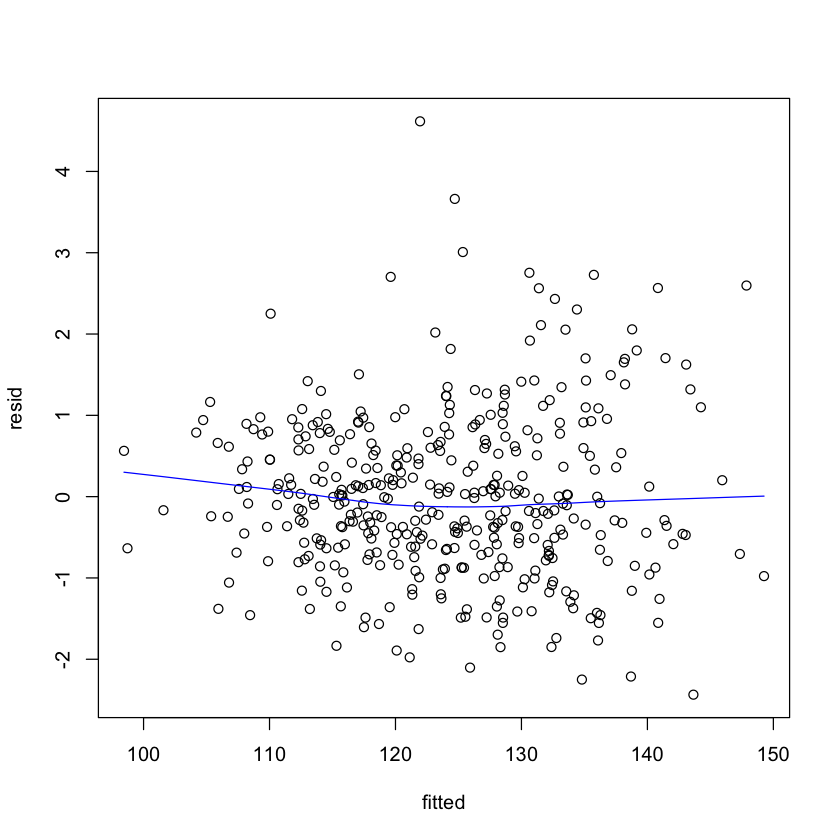

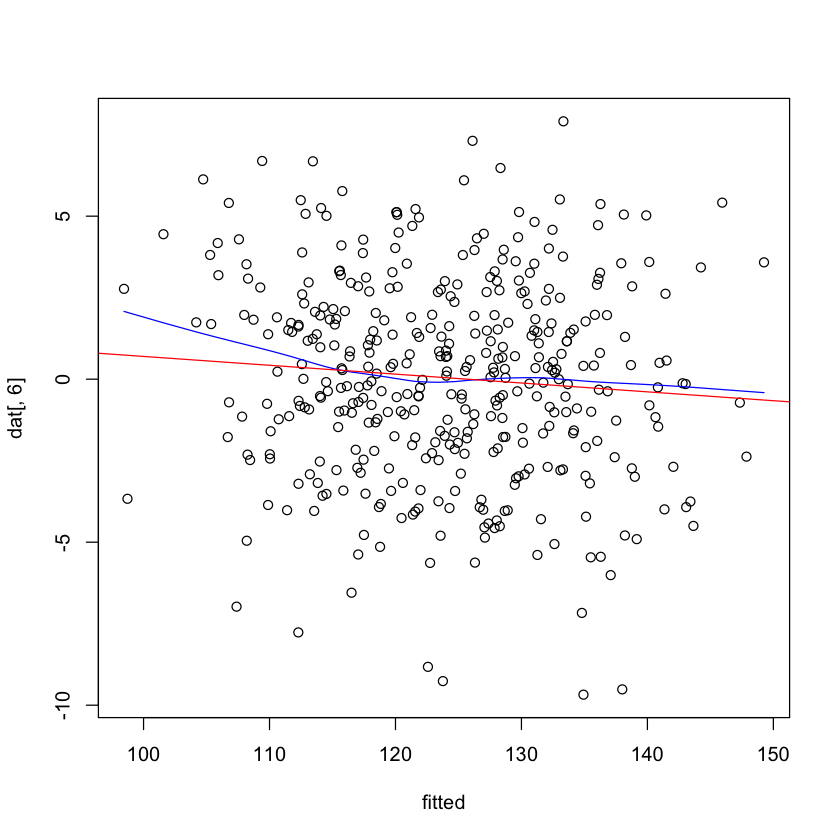

In [48]:
## Simulation for predictors ##

# This following function provides a data set with p+1 columns #
gendata <- function(n, p){
  Xmat <- matrix(runif(n*p, 0, 1), nrow = n, ncol = p)
  Y <- 4*( (sin(pi*Xmat[,1]*Xmat[,2])) + 8*(Xmat[,3] - 0.5)^3 +
              1.5*Xmat[,4] - Xmat[,5] - 0.77    ) + rnorm(n, 0, 1)
  dat <- cbind(Xmat, Y)
  return(dat)
}

set.seed(1003998757)
dat <- as.data.frame(gendata(400, 5))  # 400 simulations
colnames(dat) <- c(paste0("X", 1:5), "Y")
# head(dat)

model <- lm(dat$Y ~ ., data = dat)
head(model.matrix(model.lm))

resid <- rstudent(model.lm)
fitted <- predict(model.lm)
plot(resid~fitted)
lines(lowess(fitted, resid), col = "blue")



plot(dat[,6]~fitted)
lines(lowess(fitted, dat[,6]), col = "blue")
mmm <- lm (dat[,6] ~ fitted)
abline(mmm, col='red')

In [49]:

# leverage bs
h <- hatvalues(model.lm)
# print
thresh <- (2 * dim(model.matrix(model))[2]) / nrow(dat)
w <- which(h>thresh)

print('Leverages:')
print(w)



### The Influential Observations ####
D <- cooks.distance(model.lm)
# p = 6 since 5 samples + 1
# n - p - 1 -> 4 params
which(D > qf(0.5, 6, 494))

print('Influentials:')
print(which(D > qf(0.5, 6, 494))
)



# ## DFFITS ##
print('Dfits:')
dfits <- dffits(model.lm)
which(abs(dfits) > 2*sqrt(5/500))

## DFBETAS ##
print('DFbetas:')
dfb <- dfbetas(model.lm)
which(abs(dfb[,1]) > 2/sqrt(500))


[1] "Leverages:"
140 278 661 510 663 312 461  65  12 577  98 202 183 182 223 310 334 581 485  93 
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
321 197 653 346 255 525 359 501 571 616 289 317 664 106 598  80 607  84  20 300 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  6  41 309 632 241   5 456 609  34 502 266 327 392 108 272  30 119 148 667  91 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
336 716 328 727 709 230  40 285 353 563 280 469 643 703 682 437 350 367 541 360 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
610 107 742 537 423 218  73 476 136 253 332 491 459   8 361 615 549 201 155 217 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
186 684 511 282  85 410 668 671 714  50 647 131 523 113 724  96 372 475 313 731 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
678 618 259

named integer(0)

[1] "Influentials:"
named integer(0)
[1] "Dfits:"


461  12 202 310 334 255 525 501 571 616 289 664 106 598  80 607  20 300   6 632 
  7   9  12  16  17  25  26  28  29  30  31  33  34  35  36  37  39  40  41  44 
241 456 266 108 272  30 119  91 336 716 353 563 703 437 541 610 107 423 218 476 
 45  47  51  54  55  56  57  60  61  62  69  70  74  76  79  81  82  85  86  88 
136 332 491 615 549 217 684 511 410 671  50 647 131 523 113 372 475 731 618  35 
 89  91  92  96  97 100 102 103 106 108 110 111 112 113 114 117 118 120 122 124 
 23  15 522 669 171 303 662  78 159 508 590 530 207 271 428 128 457 641  99 561 
125 127 128 131 135 137 138 139 146 147 150 151 153 154 155 156 159 160 161 162 
639 719 507 225 665 184 343  72 209 177 122 425 382 399  43 178 374  95 497  63 
163 164 165 170 171 172 174 176 177 178 181 186 188 189 190 194 196 197 202 203 
145  57 161  21 406 424 630  39 412 436 619 627 229 245 322 659 413 460 150 688 
204 205 208 212 213 214 215 216 217 219 220 225 227 228 229 230 232 233 234 236 
339 111 657 315 276 133  81 704  51 551 394 319 215 738   1 373  26 597 340 167 
238 240 241 243 246 249 252 257 262 264 267 270 271 274 277 283 285 292 294 295 
386 488   3 187 181 444 126  59 200 564 578 707 674 670 557 625 338 104 532 239 
296 298 301 303 304 308 311 314 315 316 317 319 322 323 324 325 327 329 331 332 
129  17  94 249 713 231  49 263 582 375 694 407 443 362 281 739 520 368 628 531 
333 334 335 336 338 340 342 343 345 348 349 354 355 356 357 358 361 362 365 366 
432 314  90  64 405 337 363 626  47 383 743 160 390 226 695 130 265 199 
368 369 370 371 372 377 378 379 380 381 386 388 390 392 393 394 398 400

[1] "DFbetas:"


571 664 598 108  30  91 437 423 332 131 669 662 209 122 399  43 161 245 688 339 
 29  33  35  54  56  60  76  85  91 112 131 138 177 181 189 190 208 228 236 238 
315 704 394 373 167 126 625 239 281  47 
243 257 267 283 295 311 325 332 357 380

## VIF ##

In [50]:
car::vif(model.lm)

,GVIF,Df,GVIF^(1/(2*Df))
Gender,2.296381,1,1.515382
Age,1.965802,1,1.402071
Race3,2.115218,5,1.077793
Education,2.043866,4,1.093469
MaritalStatus,2.608701,5,1.100633
HHIncome,13.566614,11,1.125838
Poverty,6.044740,1,2.458605
Weight,102.209153,1,10.109854
Height,22.635754,1,4.757705
BMI,88.682723,1,9.417150


A VIF between 5 and 10 indicates high correlation that may be problematic. And if the VIF goes above 10, you can assume that the regression coefficients are poorly estimated due to multicollinearity.

## Variable Selection (Model Selection) ##

[1] 4.208965

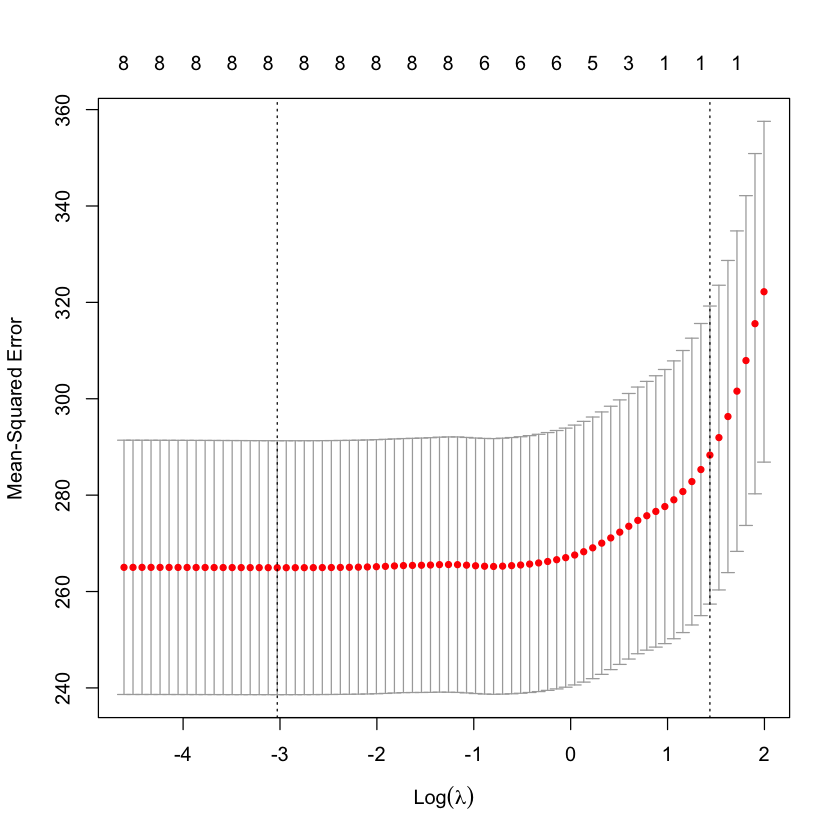

In [51]:
## Perform cross validation to choose lambda ##
# set.seed(1002656486)
cv.out <- cv.glmnet(x = data.matrix(train[,2:9]), y = train$BPSysAve, standardize = T, alpha = 1)
plot(cv.out)
best.lambda <- cv.out$lambda.1se
best.lambda
co<-coef(cv.out, s = "lambda.1se")

In [52]:
## threfvshold for variable selection ##

thresh <- 0.00
# select variables #
inds<-which(abs(co) > thresh )
variables<-row.names(co)[inds]
sel.var.lasso<-variables[!(variables %in% '(Intercept)')]
sel.var.lasso


[1] "Age"

In [53]:
## Step wise regression ###

### First fit a multiple linear regression ##
## Based on AIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.aic <- step(model.lm, trace = 0, k = 2, direction = "both") 
sel.var.aic<-attr(terms(sel.var.aic), "term.labels")   
sel.var.aic



Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Gender"  "Age"     "Poverty" "Height"

## Srinkage Methods ##

In [54]:
# ## Perform Prediction ##
pred.y <- predict(model.lm, newdata = test, type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y)^2)

## Fit a ridge penalty ##
model.ridge <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve, 
                      standardize = T, alpha = 0)

# ## Perform Prediction ##
pred.y.ridge <- predict(model.ridge, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")

# ## Prediction error ##
mean((test$BPSysAve - pred.y.ridge)^2)


# ## Fit a LASSO penalty ## --> shrinkage method 
model.lasso <- glmnet(x = model.matrix( ~ ., data = train[,-c(1,12)]), y = train$BPSysAve
                      , standardize = T, alpha = 1)

# ## Perform Prediction ##
pred.y.lasso <- predict(model.lasso, newx = model.matrix( ~ ., data = test[,-c(1,12)]), type = "response")
# ## Prediction error ##
mean((test$BPSysAve - pred.y.lasso)^2)


[1] 252.7126

[1] 276.8457

[1] 252.1785

In [55]:
## Elastic net ##

model.EN <- glmnet(x = data.matrix(train[,2:9]), y = train$BPSysAve, standardize = T, alpha = 0.5)

# ## Perform Prediction ##
pred.y.EN <- predict(model.EN, newx = data.matrix(test[,2:9]), type = "response")

## Model Validation ##

In [56]:

## Based on BIC ##
# model.lm <- lm(lpsa ~ ., data = train[, -c(1)])
summary(model.lm)  
n <- nrow(train)
sel.var.bic <- step(model.lm, trace = 0, k = log(n), direction = "both") 
sel.var.bic<-attr(terms(sel.var.bic), "term.labels")   
sel.var.bic


### Cross Validation and prediction performance of AIC based selection ###
ols.aic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
aic.cross <- calibrate(ols.aic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("aic_cross.pdf", height = 8, width = 16)
plot(aic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with AIC")
dev.off()

## Test Error ##
pred.aic <- predict(ols.aic, newdata = test[,which(colnames(train) %in% c(sel.var.aic, "BPSysAve"))])
## Prediction error ##
pred.error.AIC <- mean((test$BPSysAve - pred.aic)^2)


Call:
lm(formula = BPSysAve ~ ., data = train[, -c(1)])

Residuals:
    Min      1Q  Median      3Q     Max 
-36.653 -10.108  -1.269   9.552  69.049 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               195.31152   67.12715   2.910  0.00384 ** 
Gendermale                  4.06058    2.43465   1.668  0.09621 .  
Age                         0.53846    0.06484   8.304 2.03e-15 ***
Race3Black                  7.48535    5.73519   1.305  0.19267    
Race3Hispanic               4.06378    6.16467   0.659  0.51018    
Race3Mexican                3.55583    5.89748   0.603  0.54693    
Race3White                  0.97877    5.25457   0.186  0.85234    
Race3Other                 -3.18834    6.83469  -0.466  0.64114    
Education9 - 11th Grade     1.50893    3.77297   0.400  0.68944    
EducationHigh School       -2.51853    3.52145  -0.715  0.47495    
EducationSome College      -1.05749    3.58732  -0.295  0.76833    
EducationCollege G

[1] "Age"


n=400   Mean absolute error=0.583   Mean squared error=1.21268
0.9 Quantile of absolute error=1.108



pdf 
  2

In [57]:

### Cross Validation and prediction performance of BIC based selection ###
ols.bic <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))], 
               x=T, y=T, model = T)

## 10 fold cross validation ##    
bic.cross <- calibrate(ols.bic, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("bic_cross.pdf", height = 8, width = 16)
plot(bic.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with BIC")
dev.off()

## Test Error ##
pred.bic <- predict(ols.bic, newdata = test[,which(colnames(train) %in% c(sel.var.bic, "BPSysAve"))])
## Prediction error ##
pred.error.BIC <- mean((test$BPSysAve - pred.bic)^2)

### Cross Validation and prediction performance of lasso based selection ###
ols.lasso <- ols(BPSysAve ~ ., data = train[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))], 
                 x=T, y=T, model = T)

## 10 fold cross validation ##    
lasso.cross <- calibrate(ols.lasso, method = "crossvalidation", B = 10)
## Calibration plot ##
pdf("lasso_cross.pdf", height = 8, width = 16)
plot(lasso.cross, las = 1, xlab = "Predicted Probability", main = "Cross-Validation calibration with LASSO")
dev.off()

## Test Error ##
pred.lasso <- predict(ols.lasso, newdata = test[,which(colnames(train) %in% c(sel.var.lasso, "BPSysAve"))])
## Prediction error ##
pred.error.lasso <- mean((test$BPSysAve - pred.lasso)^2)

print(c(pred.error.AIC, pred.error.BIC, pred.error.lasso))



n=400   Mean absolute error=1.573   Mean squared error=5.10348
0.9 Quantile of absolute error=2.186



pdf 
  2


n=400   Mean absolute error=1.164   Mean squared error=3.36207
0.9 Quantile of absolute error=2.096



pdf 
  2

[1] 240.0521 245.8945 245.8945
